In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import os 
import librosa.display
import keras

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.regularizers import l2
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

Using TensorFlow backend.
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [20]:

file =os.listdir('D:\\study\\ML\\spoken_digit\\free-spoken-digit-dataset-master\\recordings')
data=[]
for i in file:
    x , sr = librosa.core.load('D:\\study\\ML\\spoken_digit\\free-spoken-digit-dataset-master\\recordings\\'+i)
    data.append(x)

In [35]:
file =os.listdir('D:\\study\\ML\\spoken_digit\\free-spoken-digit-dataset-master\\recordings')
for i in file:
    
    x , sr = librosa.core.load('D:\\study\ML\\spoken_digit\\free-spoken-digit-dataset-master\\recordings\\'+i)
    #plt.figure(figsize=(14, 5))
    #librosa.display.waveplot(x, sr=sr)
    spec = np.abs(librosa.stft(x, hop_length=256))
    spec = librosa.amplitude_to_db(spec, ref=np.max)
    librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
    
    filename="C:\\Users\\user\\Desktop\\spectogram\\"+i;
    spectogram_path = filename + i.replace('.wav', '.png')

    plt.savefig(spectogram_path, dpi=15, bbox_inches='tight',pad_inches=0);
    plt.close();
    

In [2]:
 filename=os.listdir("C:\\Users\\user\\Desktop\\spectogram")
# y = [i[0] for i in filename]
# import pandas as pd 
# Y = pd.get_dummies(y)
# print(Y)


In [3]:
Y=[]
for i in filename:
    y=i[0]
    Y.append(y)
    
Y

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1'

In [4]:
import pandas as pd
df=pd.DataFrame({
    'filename':filename,
    'category':Y
})
df

,filename,category
0,0_jackson_0.wav0_jackson_0.png,0
1,0_jackson_1.wav0_jackson_1.png,0
2,0_jackson_10.wav0_jackson_10.png,0
3,0_jackson_11.wav0_jackson_11.png,0
4,0_jackson_12.wav0_jackson_12.png,0
...,...,...
1495,9_theo_5.wav9_theo_5.png,9
1496,9_theo_6.wav9_theo_6.png,9
1497,9_theo_7.wav9_theo_7.png,9
1498,9_theo_8.wav9_theo_8.png,9


In [5]:
train_df,validate_df = train_test_split(df,test_size=0.15,
  random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [6]:
batch_size = 15

datagen_train = ImageDataGenerator( horizontal_flip=False)

train_generator = datagen_train.flow_from_dataframe(train_df,
                                                    "C:\\Users\\user\\Desktop\\spectogram\\",x_col='filename',y_col='category',
                                                    target_size=(75,45),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)
                                    

datagen_validation = ImageDataGenerator(horizontal_flip=False)
validation_generator = datagen_validation.flow_from_dataframe(validate_df,
                                                              "C:\\Users\\user\\Desktop\\spectogram\\",x_col='filename',y_col='category',
                                                    target_size=(75,45),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 1275 validated image filenames belonging to 10 classes.
Found 225 validated image filenames belonging to 10 classes.


In [7]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(32,(3,3), padding='same', input_shape=(75,45,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(64,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# 3rd Convolution layer
model.add(Conv2D(128,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

opt =  Adam(lr=1e-4)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 45, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 75, 45, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 75, 45, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 22, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 37, 22, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 22, 64)        18496     
____

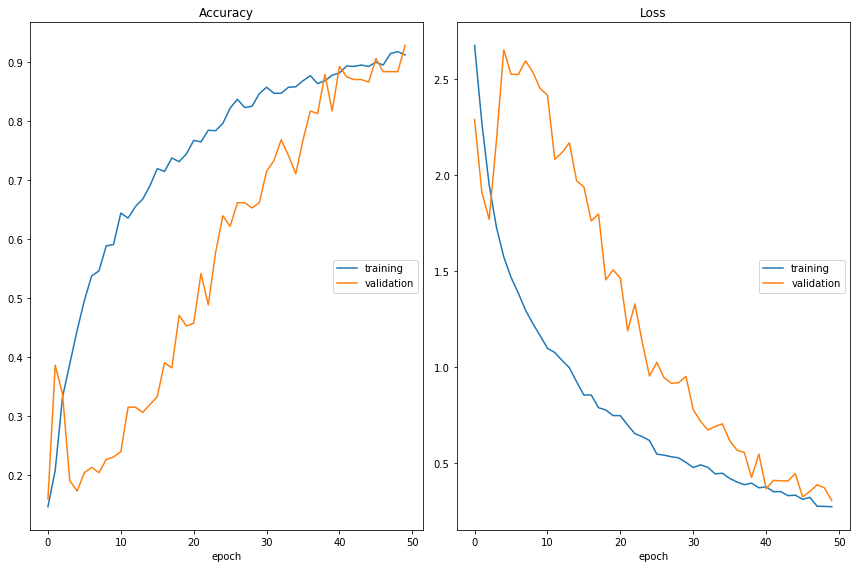

Accuracy
	training         	 (min:    0.147, max:    0.918, cur:    0.913)
	validation       	 (min:    0.160, max:    0.929, cur:    0.929)
Loss
	training         	 (min:    0.275, max:    2.675, cur:    0.275)
	validation       	 (min:    0.307, max:    2.652, cur:    0.307)

Epoch 00050: saving model to model_weights.h5
85/85 [==============================] - 32s 371ms/step - loss: 0.2745 - acc: 0.9129 - val_loss: 0.3069 - val_acc: 0.9289


In [10]:
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF

epochs = 50
steps_per_epoch = total_train//batch_size
validation_steps = total_validate//batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01,
                              patience=2, min_lr=0.00005, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]

history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)




In [11]:
from keras.models import model_from_json
model_json = model.to_json()
with open("model(sopken_dig).json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model(spoken_digit).h5")
print("Saved model to disk")

Saved model to disk


In [60]:
test_data_generator = ImageDataGenerator()
test_generator = test_data_generator.flow_from_directory(
    'C:\\Users\\user\\Desktop\\test_audio',
    target_size=(75, 45),
    batch_size=1,
    color_mode="rgb",
    class_mode="categorical", 
    shuffle=False)

Found 22 images belonging to 1 classes.


In [61]:
probabilities = model.predict_generator(test_generator,22)

In [69]:
probabilities[15].argmax()

6

In [45]:
def trim_silence(audio, noise_threshold=150):
    """ Removes the silence at the beginning and end of the passed audio data

    :param audio: numpy array of audio
    :param noise_threshold: the maximum amount of noise that is considered silence
    :return: a trimmed numpy array
    """
    start = None
    end = None

    for idx, point in enumerate(audio):
        if abs(point) > noise_threshold:
            start = idx
            break

    # Reverse the array for trimming the end
    for idx, point in enumerate(audio[::-1]):
        if abs(point) > noise_threshold:
            end = len(audio) - idx
            break

    return audio[start:end]


def trim_silence_file(file_path, noise_threshold=150):
    """Accepts a file path, trims the audio and overwrites the original file with the trimmed version.

    :param file_path: file to trim
    :param noise_threshold: the maximum amount of noise that is considered silence
    :return: None
    """
    rate, audio = scipy.io.wavfile.read('C:\\Users\\user\\Desktop\\mytest\\3.wav')
    trimmed_audio = trim_silence(audio, noise_threshold=noise_threshold)
    scipy.io.wavfile.write(file_path, rate, trimmed_audio)


In [46]:
file =os.listdir('C:\\Users\\user\\Desktop\\mytest')
for i in file:
    
    x , sr = librosa.core.load('C:\\Users\\user\\Desktop\\mytest\\'+i)
    #plt.figure(figsize=(14, 5))
    #librosa.display.waveplot(x, sr=sr)
    spec = np.abs(librosa.stft(x, hop_length=256))
    spec = librosa.amplitude_to_db(spec, ref=np.max)
    librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
    
    filename="C:\\Users\\user\\Desktop\\answer\\"+i;
    spectogram_path = filename + i.replace('.wav', '.png')

    plt.savefig(spectogram_path, dpi=15, bbox_inches='tight',pad_inches=0);
    plt.close();

In [55]:
import cv2
test_image = cv2.resize(cv2.imread("3_.png"),  (75,45))
test_image = np.array(test_image).reshape( -1, 75, 45, 3)
#prediction = model.predict(test_image)
im=np.array(test_image)


prediction = model.predict(im)


In [56]:
prediction.argmax()

6